In [80]:
# load netcdf from OM4 runs

import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
import cartopy.crs as ccrs
from matplotlib.colorbar import ColorbarBase

In [81]:
# paths to dataset
BASE = '/scratch/ab10313/OM4_output/'

# load FK ideal age data and take mean over last 5 years of JRA cycle
ds_age_FK = xr.open_dataset(BASE+'age/CNTRL_ocean_annual_z.2018-2022.agessc.nc')
age_FK = ds_age_FK.agessc.mean('time')

# load BD ideal age data and take mean over last 5 years of JRA cycle
ds_age_BD = xr.open_dataset(BASE+'age/MLE22_ocean_annual_z.2018-2022.agessc.nc')
age_BD = ds_age_BD.agessc.mean('time')


# load FK MLD data 
ds_MLD_EN1_FK = xr.open_dataset(BASE+'cntrl/ocean_monthly.201801-202212.MLD_EN1.nc')
ds_MLD_EN2_FK = xr.open_dataset(BASE+'cntrl/ocean_monthly.201801-202212.MLD_EN2.nc')

# group by season and take mean over summer (EN1) and winter (EN2) for last 5 years of JRA cycle
# Southern Hemisphere (SH)
MLD_summer_SH_FK = ds_MLD_EN1_FK.MLD_EN1.groupby("time.season").mean('time',skipna=True).sel(season='DJF').isel(yh=range(0,503))
MLD_winter_SH_FK = ds_MLD_EN2_FK.MLD_EN2.groupby("time.season").mean('time',skipna=True).sel(season='JJA').isel(yh=range(0,503))

# Northern Hemisphere (NH)
MLD_summer_NH_FK = ds_MLD_EN1_FK.MLD_EN1.groupby("time.season").mean('time',skipna=True).sel(season='JJA').isel(yh=range(503,1080))
MLD_winter_NH_FK = ds_MLD_EN2_FK.MLD_EN2.groupby("time.season").mean('time',skipna=True).sel(season='DJF').isel(yh=range(503,1080))

# concat SH and NH for summer and winter datasets
MLD_summer_FK = xr.concat([MLD_summer_SH_FK, MLD_summer_NH_FK], "yh")
MLD_winter_FK = xr.concat([MLD_winter_SH_FK, MLD_winter_NH_FK], "yh")


# load BD MLD data 
ds_MLD_EN1_BD = xr.open_dataset(BASE+'c30/ocean_monthly.201801-202212.MLD_EN1.nc')
ds_MLD_EN2_BD = xr.open_dataset(BASE+'c30/ocean_monthly.201801-202212.MLD_EN2.nc')

# group by season and take mean over summer (EN1) and winter (EN2) for last 5 years of JRA cycle
# Southern Hemisphere (SH)
MLD_summer_SH_BD = ds_MLD_EN1_BD.MLD_EN1.groupby("time.season").mean('time',skipna=True).sel(season='DJF').isel(yh=range(0,503))
MLD_winter_SH_BD = ds_MLD_EN2_BD.MLD_EN2.groupby("time.season").mean('time',skipna=True).sel(season='JJA').isel(yh=range(0,503))

# Northern Hemisphere (NH)
MLD_summer_NH_BD = ds_MLD_EN1_BD.MLD_EN1.groupby("time.season").mean('time',skipna=True).sel(season='JJA').isel(yh=range(503,1080))
MLD_winter_NH_BD = ds_MLD_EN2_BD.MLD_EN2.groupby("time.season").mean('time',skipna=True).sel(season='DJF').isel(yh=range(503,1080))

# concat SH and NH for summer and winter datasets
MLD_summer_BD = xr.concat([MLD_summer_SH_BD, MLD_summer_NH_BD], "yh")
MLD_winter_BD = xr.concat([MLD_winter_SH_BD, MLD_winter_NH_BD], "yh")


# load static file
ds_stat = xr.open_dataset(BASE+'ocean_annual_z.static.nc')

## plot MLD and ideal age 

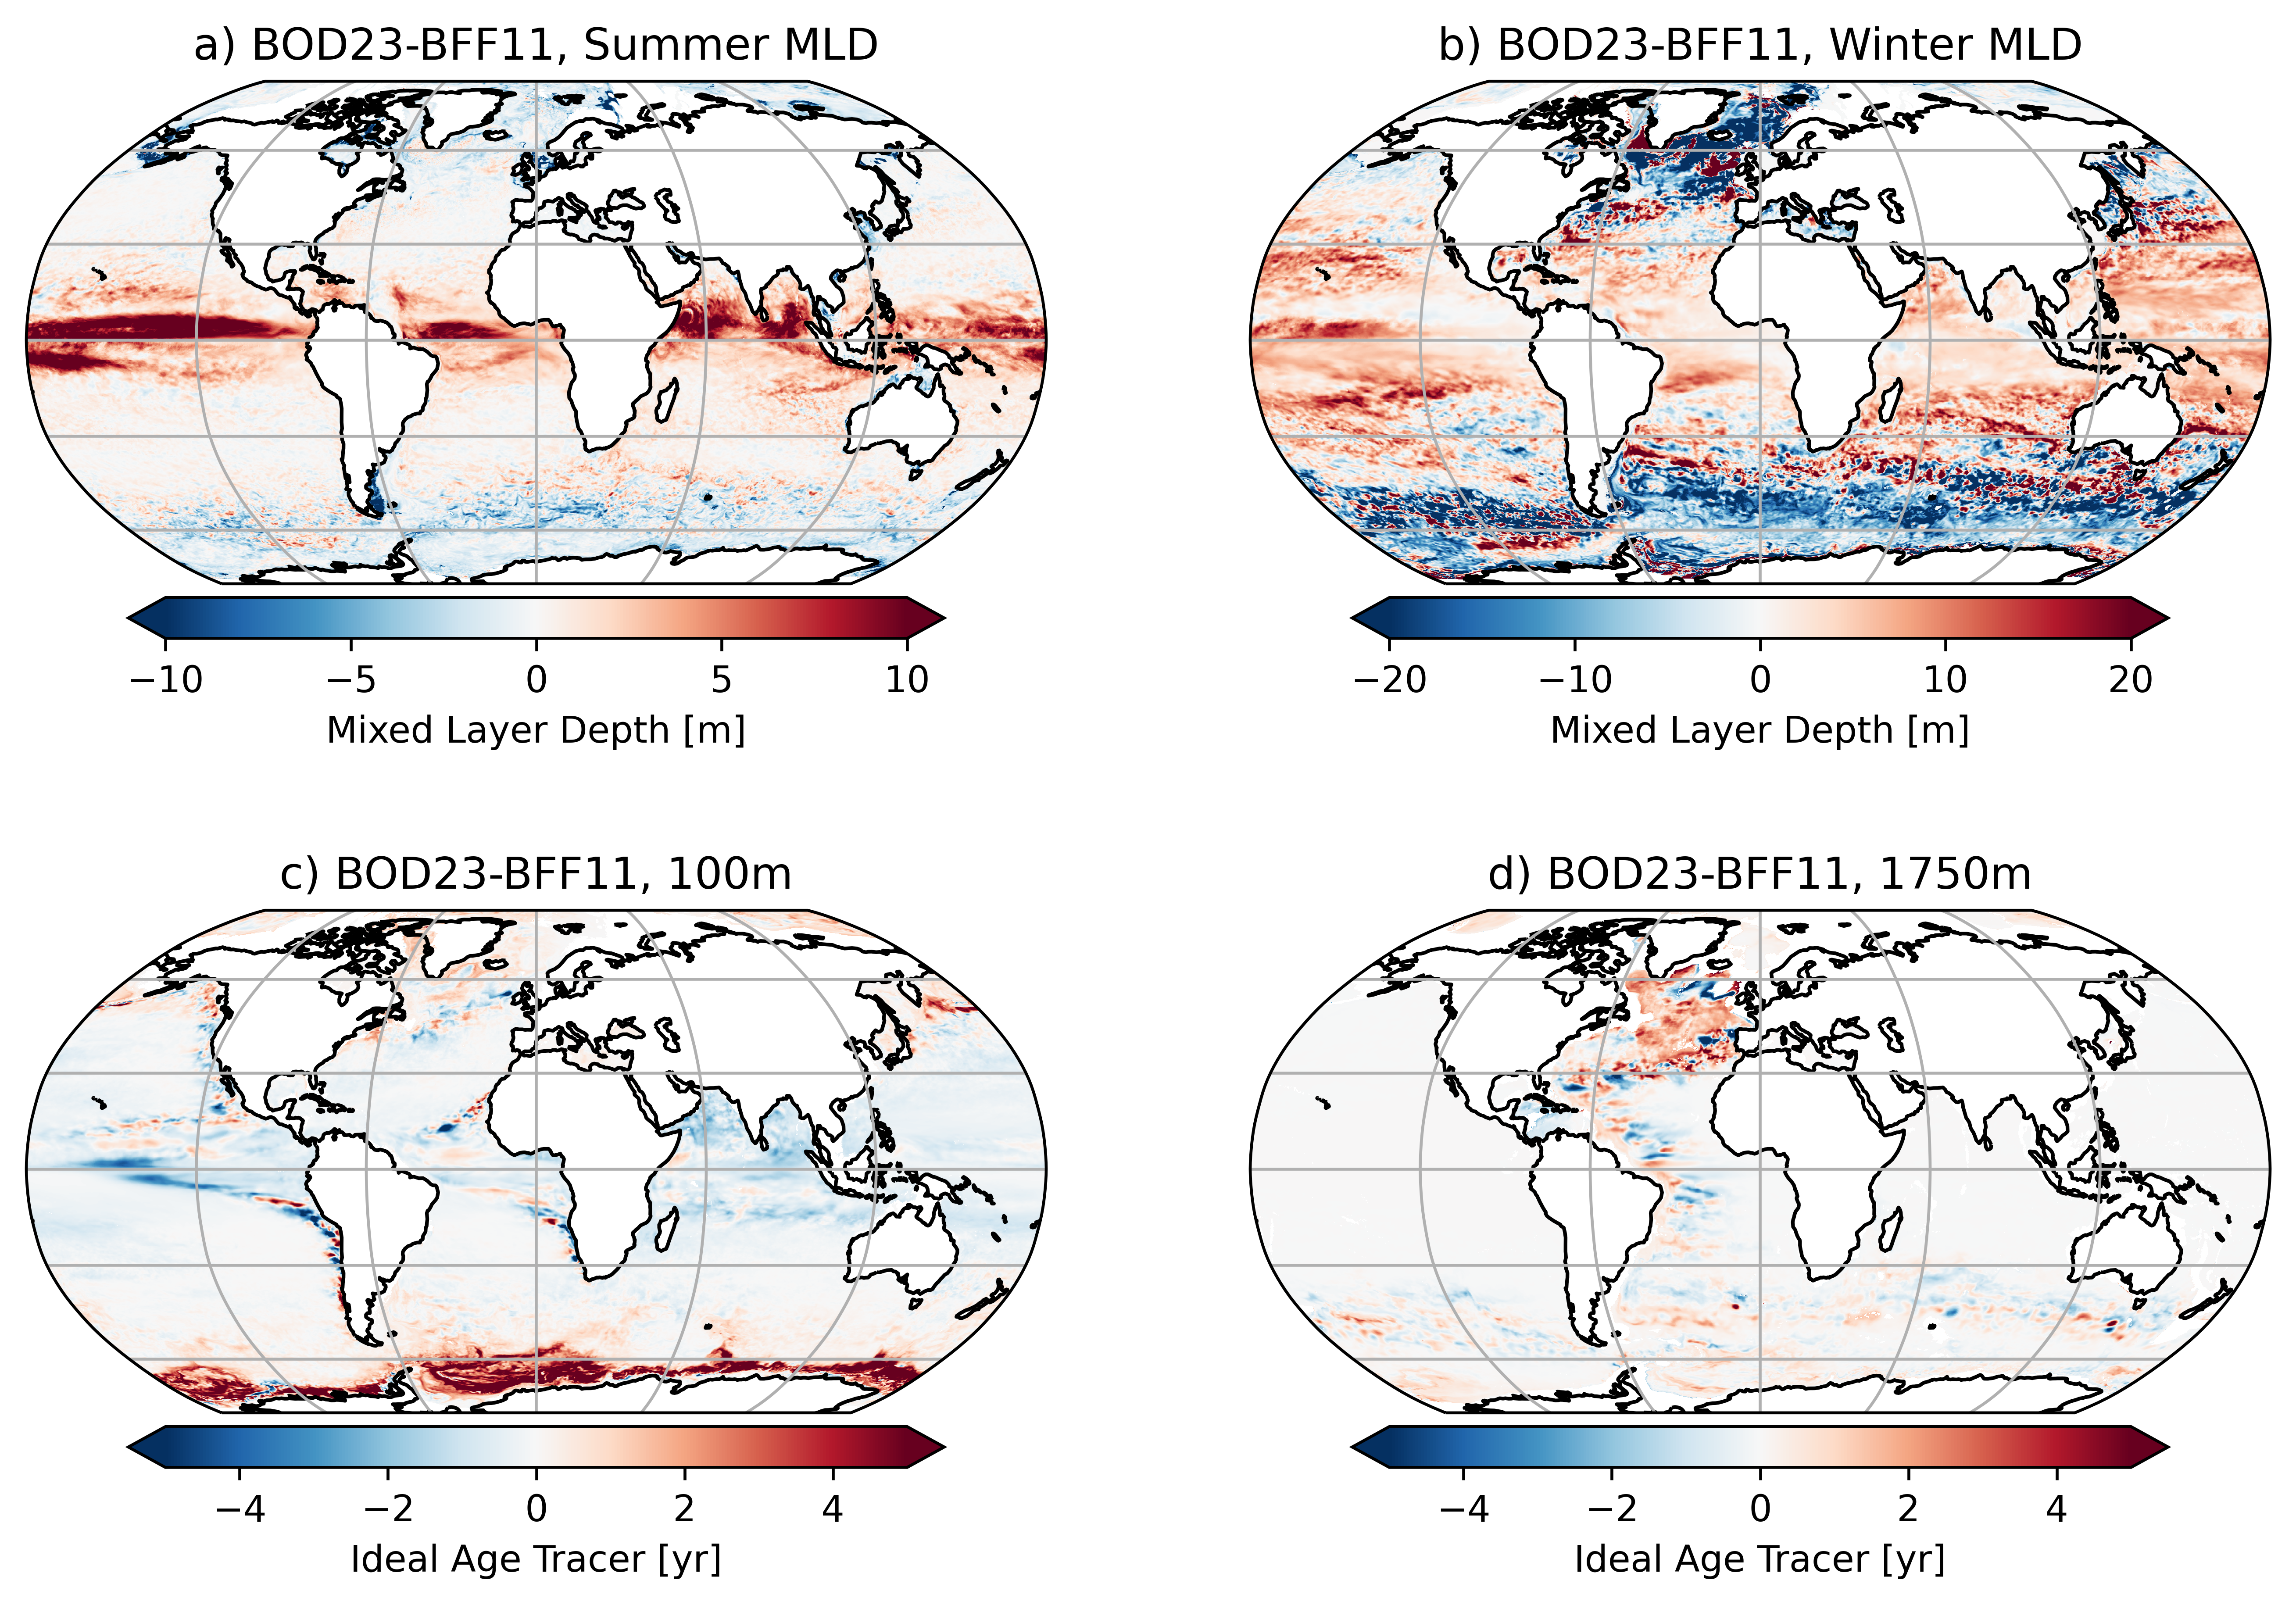

In [84]:
# create a figure
#fig = plt.figure()
fig, ax = plt.subplots(nrows=2,ncols=2,
                        subplot_kw={'projection': ccrs.Robinson(central_longitude=0)},
                        figsize=(11,7.5), dpi=600)

ax=ax.flatten()

# BD minus FK - summer MLD 
i_ax = 0

( MLD_summer_BD- MLD_summer_FK).rename('Mixed Layer Depth [m]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-20,
    vmax=20,          
    cmap="RdBu_r",  
    cbar_kwargs={'orientation': 'horizontal','pad': 0.02, 'shrink':0.8},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('a) BOD23-BFF11, Summer MLD')


# BD minus FK - winter MLD
i_ax = 1
( MLD_winter_BD-MLD_winter_FK).rename('Mixed Layer Depth [m]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-20,
    vmax=20,          
    cmap="RdBu_r", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.02, 'shrink':0.8},
)

ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('b) BOD23-BFF11, Winter MLD')



# BD minus FK - mixed layer (100m)
i_ax = 2

(age_BD.isel(z_l=6) - age_FK.isel(z_l=6) ).rename('Ideal Age Tracer [yr]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-5,
    vmax=5,          
    cmap="RdBu_r",  
    cbar_kwargs={'orientation': 'horizontal','pad': 0.02, 'shrink':0.8},
)
ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('c) BOD23-BFF11, 100m')


# BD minus FK - depth (1750m)
i_ax = 3
(age_BD.isel(z_l=24) - age_FK.isel(z_l=24) ).rename('Ideal Age Tracer [yr]').plot(
    ax=ax[i_ax],
    transform=ccrs.PlateCarree(),  
    vmin=-5,
    vmax=5,          
    cmap="RdBu_r", 
    cbar_kwargs={'orientation': 'horizontal','pad': 0.02, 'shrink':0.8},
)

ax[i_ax].coastlines()
ax[i_ax].gridlines()
ax[i_ax].set_title('d) BOD23-BFF11, 1750m')

# save figure
plt.savefig('./figures/MLD_ideal_age')
